In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
import rocketpy

from rocketpy import Environment, Flight, Function, Rocket, SolidMotor

plt.style.use("seaborn-v0_8-dark-palette")

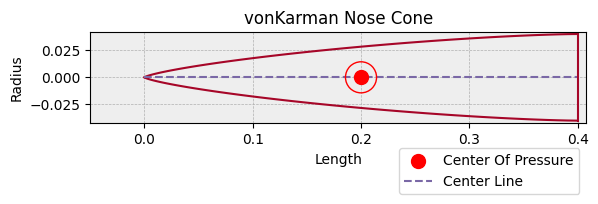

In [25]:

Aerotech_L1265WS = SolidMotor(
    thrust_source="rocketData/Regulus/AeroTech_L1256WS.eng",
    dry_mass=1.792,
    dry_inertia=(0.125, 0.125, 0.002),
    nozzle_radius=33 / 1000,
    grain_number=5,
    grain_density=1815,
    grain_outer_radius=33 / 1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=120 / 1000,
    grain_separation=5 / 1000,
    grains_center_of_mass_position=0.397,
    center_of_dry_mass_position=0.317,
    nozzle_position=0,
    burn_time=3,
    throat_radius=11 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)
Cesaroni_L1355 = SolidMotor(
    thrust_source="rocketData/Regulus/Cesaroni_4025L1355-P.eng",
    dry_mass=1.792,
    dry_inertia=(0.125, 0.125, 0.002),
    nozzle_radius=33 / 1000,
    grain_number=4,
    grain_density=1815,
    grain_outer_radius=33 / 1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=120 / 1000,
    grain_separation=5 / 1000,
    grains_center_of_mass_position=0.310,
    center_of_dry_mass_position=0.317,
    nozzle_position=0,
    burn_time=2.97,
    throat_radius=11 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

Regulus = Rocket(
    radius = 80/2000,
    mass = 7.67,
    inertia = (3.239, 3.239, 0.0063),
    power_off_drag = "rocketData/Regulus/Regulus CD power off.csv",
    power_on_drag = "rocketData/Regulus/Regulus CD power off.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",

)
Regulus.add_motor(Cesaroni_L1355, position=-1.45)


nose_cone = Regulus.add_nose(
    length=0.40, kind="vonKarman", position=0.95
).draw()

fin_set = Regulus.add_trapezoidal_fins(
    n=4,
    root_chord=0.22,
    tip_chord=0.065,
    span=0.055,
    position=-1.19,

    airfoil=None,
).draw


Main = Regulus.add_parachute(
    "Main",
    cd_s=0.76,
    trigger=800,
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Drogue = Regulus.add_parachute(
    "Drogue",
    cd_s=0.085,
    trigger="apogee",
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)


In [26]:
# Environment conditions
import datetime

env = Environment(latitude=55.432968, longitude=-5.700802, elevation=5)
tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time


env.set_atmospheric_model(type="Forecast", file="GFS")

In [27]:
# Flight
flight = Flight(
rocket= Regulus, 
environment=env, 
rail_length=3, 
inclination=90, 
heading=0
)

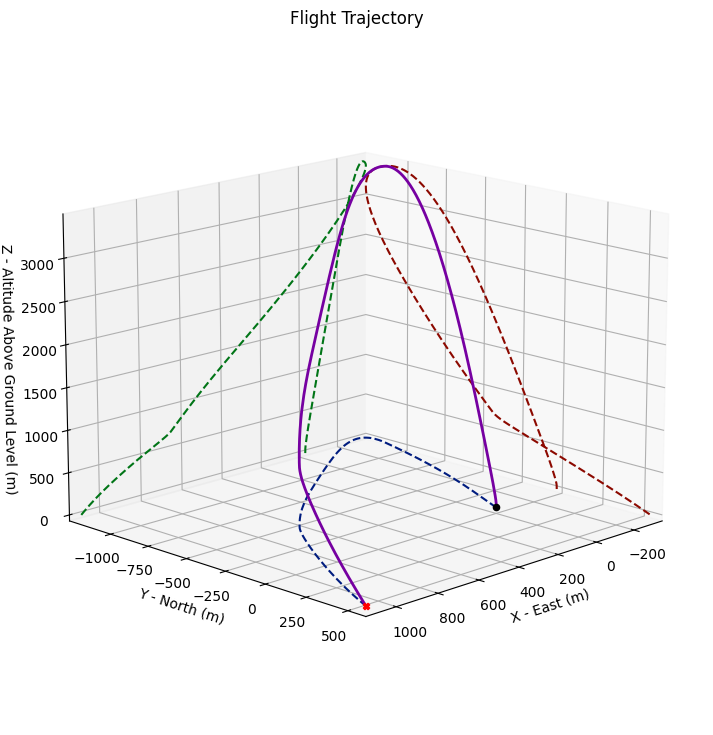

Function from R1 to R1 : (Time (s)) → (Vx (m/s))


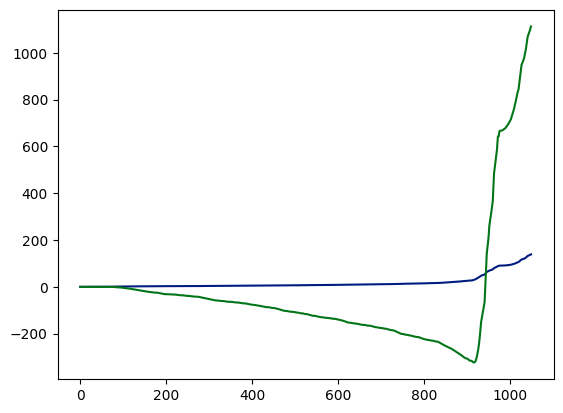

In [28]:
#Plotting

flight.plots.trajectory_3d()
print(flight.vx)

plt.plot(flight.x)

In [29]:
print(flight.x(1.5))

-3.557248272355183


In [32]:
#Function for exporting flight instances as CSV
import csv
import numpy as np

# Assuming `flight` is your Flight object instance and it now also includes:
# - Flight.ax(t), Flight.ay(t), Flight.az(t), Flight.alpha1(t), Flight.alpha2(t), and Flight.alpha3(t)

# Define the range of time and step size for which you want to export data
start_time = 0
end_time = 100  # Example: 100 seconds after launch
time_step = 0.01  # Example: Evaluate every second

# Define the CSV file name
csv_file_name = 'Regulus ' + str(1/time_step) + "Hz.csv"

# Open a new CSV file for writing
with open(csv_file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the header row
    writer.writerow([
        'Time', 'X', 'Y', 'Z', 'VX', 'VY', 'VZ',
        'Euler 0', 'Euler 1', 'Euler 2', 'Euler 3',
        'Omega 1', 'Omega 2', 'Omega 3',
        'Latitude', 'Longitude', 'Inclination', 'Heading',
        'Ax', 'Ay', 'Az', 'Alpha 1', 'Alpha 2', 'Alpha 3'
    ])
    
    # Iterate over each time step and write data rows
    for t in np.arange(start_time, end_time + time_step, time_step):
        writer.writerow([
            t,
            flight.x(t),  # Assuming x is a function of time
            flight.y(t),  # Assuming y is a function of time
            flight.z(t),
            flight.vx(t),
            flight.vy(t),
            flight.vz(t),
            flight.e0(t),
            flight.e1(t),
            flight.e2(t),
            flight.e3(t),
            flight.w1(t),
            flight.w2(t),
            flight.w3(t),
            flight.latitude(t),
            flight.longitude(t),
            flight.inclination,  # Static value
            flight.heading,  # Static value
            flight.ax(t),  # Assuming ax is a function of time
            flight.ay(t),  # Assuming ay is a function of time
            flight.az(t),  # Assuming az is a function of time
            flight.alpha1(t),  # Assuming alpha1 is a function of time
            flight.alpha2(t),  # Assuming alpha2 is a function of time
            flight.alpha3(t)  # Assuming alpha3 is a function of time
        ])

print(f'Data exported to {csv_file_name}')


Data exported to Regulus 100.0Hz.csv
